# Análise de Sistemas em Tempo Contínuo no Domínio do Tempo

## Estabilidade


"It will be seen that the motion of a machine with its
governor consists in general of a uniform motion,
combined with a disturbance which may be expressed
as the sum of several component motions. These
components may be of four different kinds:
1. The disturbance may continually increase.
2. It may continually diminish.
3. It may be an oscillation of continually increasing
amplitude.
4. It may be an oscillation of continually decreasing
amplitude.

'The first and third cases are evidently inconsistent
with the stability of the motion; and the second and
fourth alone are admissible in a good governor. *This
condition is mathematically equivalent to the condition that all the possible roots, and all the possible
parts of the impossible roots, of a certain equation
shall be negative*"

J. Clerk Maxwell, "On Governors", 1868.


Sistemas são projetados para realizar tarefas ou processamento de sinais. Se um sistema não é estável, ele pode literalmente queimar, ou saturar quando um sinal, mesmo muito pequeno, é aplicado à sua entrada. Um sistema instável é em geral um sistema sem utilidade prática.

A resposta de um sistema pode ser decomposta em uma resposta de entrada nula e uma resposta de estado nulo, e a análise da  estabilidade pode ser aplicada separadamente para estas duas respostas.

### Estabilidade BIBO (bounded Input Bounded Output)

É a estabilidade na resposta de estado nulo, ou estabilidade da relação entrada-saída. Um sistema é BIBO estável se no sistema relaxado uma entrada limitada produz uma saída limitada. Veremos agora que para um sistema ser BIBO estável, a sua resposta ao impulso deve ser absolutamente integrável.

Considere o sistema relaxado em $t=0$, com entrada $x(t)$, saída $y(t)$ e resposta ao impulso $h(t)$.

Então, a saída é calculada como

$$y(t)=\int_{0}^{t} x(\tau)h(t-\tau) \, d\tau$$ 

Se a resposta é limitada $\|y(t)\|$ é menor que um número real máximo $y_M$, onde $y_M < \infty$. Portanto,

$$ \|y(t)\|=\Bigg\|\int_{0}^{\infty} x(\tau)h(t-\tau) \, d\tau\Bigg\| \le \int_{0}^{\infty} \big\|x(\tau)\big|\big\|h(t-\tau)\big\| \, d\tau \le y_M.$$

A entrada é limitada por hipótese, e portanto, como a resposta,  $\|x(t)\|\le x_M < \infty$, e podemos escrever que

$$\|y(t)\| \le x_M\int_{0}^{\infty}\big\|h(t-\tau)\big\|\,d\tau$$

Agora, para que exista $y_M$ como um limite superior para $y(t)$, é necessário que 

$$\int_{0}^{\infty} \big\|h(t-\tau)\big\|\,d\tau \le M < \infty,$$

o que siginifica que a integral do módulo (valor absoluto) de $h(t)$ não diverge, ou seja, $h(t)$ é absolutamente integrável.

### Estabilidade Interna 

É a estabilidade de entrada nula. Dito de outra forma, é a estabilidade dos modos característicos do sistema, caracterizados pelas funções exponenciais $e^{\lambda t}$ e $te^{\lambda t}$, onde $\lambda$ são as raízes (autovalores) reais  ou complexas. Para entrada nula, a resposta de sistema é dada pela combinação linear destes modos, e o sistema é estável quando a resposta tende a zero quando $t\rightarrow \infty$. Isso sgnifica que o sistema retorna ao estado de equilíbrio, ou seja, quando suas condições iniciais são nulas. Portanto, a estabilidade dependerá dos autovalores $\lambda$ do sistema, de forma que:

* se todos autovalores são reais e negativos, ou complexos com parte real negativa,  os modos característicos convergirão assintoticamente para zero, e o sistema é internamente ou assintoticamente estável (gráfico abaixo, primeira coluna);
* se ao menos um autovalor real for positivo, ou a parte real de um autovalor complexo for positiva, então a resposta de entrada nula diverge com o tempo, e o sistema é internamente instável (gráfico abaixo, segunda coluna);
* de outra forma, se existir raízes repetidas no eixo imaginário (autovalores reais nulos ou autovalores complexos com parte real nula repetidos), a resposta de entrada nula incluirá um termo crescente linearmente de forma ilimitada ($c_it$ ou $c_itcos(\omega t+\phi)$, e o sistema é internamente instável (gráficos abaixo, terceira coluna).
* se  todo autovalor  nulo ou com  parte real nula (raiz no eixo imaginário) não é repetido, o modo característico correspondente manterá amplitude constante com o tempo, e o sistema é dito marginalmente estável (gráficos abaixo, quarta coluna);





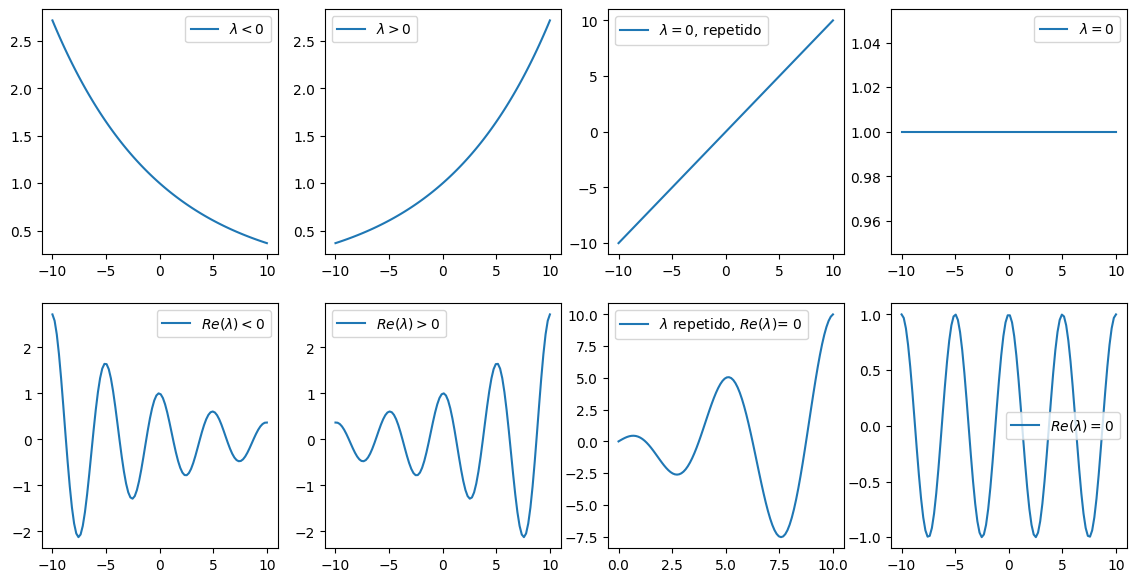

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(14,7))
t=np.linspace(-10,10,100)

y1=np.exp (-0.1*t)
y2=np.exp(0.1*t)
y3=np.exp(0*t)
y4=t
plt.subplot(2,4,1)
plt.plot(t,y1,label=r'$ \lambda< 0$')
plt.legend()
plt.subplot(2,4,2)
plt.plot(t,y2,label=r'$\lambda  >  0$')
plt.legend()
plt.subplot(2,4,4)
plt.plot(t,y3,label=r'$\lambda =  0$')
plt.legend()
plt.subplot(2,4,3)
plt.plot(t,y4,label=r'$\lambda  =  0$, repetido')
plt.legend()

omega=1.257
y5=np.exp(-0.1*t)*np.cos(omega*t)
plt.subplot(2,4,5)
plt.plot(t,y5,label=r'$Re(\lambda)  <  0$')
plt.legend()
y6=np.exp(0.1*t)*np.cos(omega*t)
plt.subplot(2,4,6)
plt.plot(t,y6,label=r'$Re(\lambda)  >  0$')
plt.legend()
y7=np.exp(0.*t)*np.cos(omega*t)
plt.subplot(2,4,8)
plt.plot(t,y7,label=r'$Re(\lambda) = 0$')
plt.legend()
t=np.linspace(0,10,100)
y8=t*np.cos(omega*t)
plt.subplot(2,4,7)
plt.plot(t,y8,label=r'$\lambda$ repetido, $Re(\lambda)$= $ 0$')
plt.legend()
plt.show();

### Observação importante sobre a relação entre os tipos de estabilidade:
se o sistema é internamente estável seus modos característicos tendem a zero quando $t\rightarrow \infty$. Sabemos que a resposta ao impulso $h(t)$ é formada por esses modos característicos, e então $h(t)$ será absolutamente integrável. Portanto, o sistema será também BIBO estável. Por outro lado, embora não usual, é possível que um sistema internamente instável seja BIBO estável devido ao cancelamento das raízes positivas dos modos característicos na resposta ao impulso, de forma que $h(t)$ torna-se absolutamente integrável.

Para ver porque isso ocorre, precisamos analisar a problema geral $Q(D)y(t)=P(D)x(t)$. A estabilidade interna é a estabilidade dos modos característicos do sistema que depende por sua vez das raízes da equação característica, ou seja, em última análise depende de $Q(D)$ somente. Além disso os mesmos modos característicos determinam a solução geral de $g(t)$. Por outro lado, no cálculo da resposta ao impulso a operação $P(D)g(t)$ pode em certos casos levar ao cancelamento dos termos instáveis na função de Green, de forma que os modos característicos de $h(t)$ sejam todos estáveis e daí o mesmo sistema seja BIBO estável, como é mostrado no exemplo a seguir.  Esta situação ocorre sempre que os polinômios $Q(D)$ e $P(D)$ possuem raizes comuns. Em situações normais entretanto, $Q(D)$ e $P(D)$ não fatoram em raízes comuns e a instabilidade interna ou a estabilidade marginal implicam a BIBO instabilidade. 

**Exemplo** Considere o sistema $(D^2+D-2)y(t)=(D-1)x(t)$.

O polinômio carcaterístico é $Q(\lambda)=\lambda^2+\lambda-2$, e as raizes caraterísticas (autovalores) são 1 e -2 ( note que $Q(D)=(D-1)(D+2)$ e $P(D)=(D-1)$). A resposta de entrada nula (formada pelos modos característicos) é

$$y_0(t)=(c_1e^t+c_2e^{-2t})u(t)$$

Note que com o termo $c_1e^t$ o sistema é internamente instável. Vamos agora calcular a resposta ao impulso. Inicialmente resolvemos o problema

$$(D^2+D-2)g(t)=0$$

com condições iniciais $g(0^+)=0$ e $g'(0^+)=1$, impostas pela ocorrência do impulso em $t=0$. Daí, a solução é

$$g(t)= \frac{1}{3}(e^t-e^{-2t})u(t)$$

Agora, a resposta ao impulso é calculada como $h(t)=P(D)g(t)u(t)$, já que a parte impulsiva da resposta é nula. Aplicando o polinômio $P(D)$ à resposta $g(t)$ resulta em

$$h(t)=(D-1)\frac{1}{3}(e^t-e^{-2t})u(t)=\frac{1}{3}(e^t+2e^{-2t}-(e^t-e^{-2t})u(t)=(e^{-2t})u(t)$$

Devido à forma particular de $P(D)$ o termo responsável pela instabilidade interna foi cancelado, e como consequência a resposta ao impulso contém unicamente o modo exponencial amortecido e portanto o sistema é BIBO estável. 